# Tujuan Bisnis Data Science:
Saya ditugaskan untuk memprediksi customer churn di perusahaan telekomunikasi untuk membantu perusahaan memahami dan mengurangi churn rate pelanggan. Model yang dibuat harus membantu dalam menyusun strategi pemasaran dan retensi pelanggan.

#### Tujuan Teknis Data Science:

1. Membuat model klasifikasi menggunakan decision tree dan satu model lainnya.
2. Mengevaluasi kinerja model menggunakan metrik:
    - Confusion matrix
    - Accuracy
    - Precision
    - Recall
    - F1-score
3. Menginterpretasikan fitur-fitur yang paling berpengaruh terhadap churn.

#### Metrik Kesuksesan:

Keberhasilan pengembangan model klasifikasi: accuracy > 70%.

# Tahapan yang Akan Dilakukan

#### 1. Menentukan kebutuhan data
Dataset "Telco-Customer-Churn.csv" sudah tersedia, bersumber dari penyedia pelatihan.
Oleh karena itu metode pengambilan data yang digunakan adalah mendownload langsung dari github, selain itu juga bisa menggunakan github API.

#### 2. Menelaah Data:
Melakukan eksplorasi awal untuk memahami struktur dan isi dataset.

Melihat distribusi data, missing values, dan hubungan antar fitur.

## _______________________________________________________________

Langkah 1: Memahami Struktur dan Isi Dataset
Memuat dan Menampilkan Informasi Dataset
Kita akan melihat struktur dataset untuk memahami tipe data dan jumlah kolom.

In [85]:
import pandas as pd

# Load dataset
data_churn = pd.read_csv('Telco-Customer-Churn.csv')

# menampilkan informasi mengenai dataset
data_info = data_churn.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7038 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Langkah 2: Deskripsi Statistik Dataset

In [87]:
# Melihat deskripsi statistik dari dataset
data_description = data_churn.describe(include='all')
print(data_description)


        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7043   7038    7043.000000    7043       7043  7040.000000   
unique        7043      4            NaN       2          2          NaN   
top     7590-VHVEG   Male            NaN      No         No          NaN   
freq             1   3550            NaN    3641       4933          NaN   
mean           NaN    NaN       0.162147     NaN        NaN    35.043892   
std            NaN    NaN       0.368612     NaN        NaN   115.282871   
min            NaN    NaN       0.000000     NaN        NaN     0.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN  7100.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

#### Informasi Dataset:

- Dataset memiliki 7043 baris dan 21 kolom.
- Ada berbagai tipe data termasuk object, int64, dan float64.
- Kolom TotalCharges bertipe object, yang seharusnya float64.

#### 3. Memvalidasi Data:
Memastikan data sesuai dengan kebutuhan analisis.
Melakukan pemeriksaan:
- Missing values
- duplicates
- Konsistensi data.


1. Memeriksa Missing Values:

In [89]:
missing_values = data_churn.isnull().sum()
print(missing_values)

customerID           0
gender               5
SeniorCitizen        0
Partner              0
Dependents           0
tenure               3
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


2. Memeriksa Duplikat:

In [90]:
duplicate_rows = data_churn.duplicated().sum()
print(duplicate_rows)

0


3. Mengatasi Konsistensi Data:

- Kolom TotalCharges awalnya bertipe object, dikonversi ke float untuk memastikan konsistensi.
- Setelah konversi, cek ulang missing values.

In [92]:
data_churn['TotalCharges'] = pd.to_numeric(data_churn['TotalCharges'], errors='coerce')

# Memeriksa kembali missing values
missing_values_after_conversion = data_churn.isnull().sum()
print(missing_values_after_conversion)

customerID           0
gender               5
SeniorCitizen        0
Partner              0
Dependents           0
tenure               3
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# Hasil Kesimpulan:
- Missing Values Sebelum Konversi:
  - gender: 5 missing values
  - tenure: 3 missing values

- Duplikat:
  - Tidak ada baris duplikat dalam dataset.


- Missing Values Setelah Konversi TotalCharges:
  - gender: 5 missing values
  - tenure: 3 missing values
  - TotalCharges: 11 missing values (setelah konversi)


# Tindakan Selanjutnya:
- Mengisi missing values untuk kolom:
  - gender
  - tenure
  - TotalCharges.

Mengisi Missing Values

- gender: Isi dengan mode (nilai yang paling sering muncul).
- tenure: Isi dengan median.
- TotalCharges: Isi dengan median.

Sedikit catatan
- Mode: Digunakan untuk mengisi missing values pada kolom gender karena gender adalah variabel kategorikal. Mode adalah nilai yang paling sering muncul dan merupakan pilihan yang masuk akal untuk menggantikan nilai yang hilang pada variabel kategorikal.
- Median: Digunakan untuk mengisi missing values pada kolom tenure dan TotalCharges karena kedua kolom ini adalah variabel numerik. Median adalah nilai tengah dari distribusi data dan untuk karena tadi saya menemukan outlier, maka saya menggunakan median karena lebih tangguh menghadapi outlier

In [93]:
# Isi missing value gender dengan mode
data_churn['gender'].fillna(data_churn['gender'].mode()[0], inplace=True)

# Isi missing value tenure dengan median
data_churn['tenure'].fillna(data_churn['tenure'].median(), inplace=True)

# Isi missing value TotalCharges dengan median
data_churn['TotalCharges'].fillna(data_churn['TotalCharges'].median(), inplace=True)

# Memeriksa kembali missing value
final_missing_values = data_churn.isnull().sum()
print(final_missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\Nur Lathifah\AppData\Local\Temp\ipykernel_2576\2452554636.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_churn['gender'].fillna(data_churn['gender'].mode()[0], inplace=True)
C:\Users\Nur Lathifah\AppData\Local\Temp\ipykernel_2576\2452554636.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

# Menentukan Object data

- Identifikasi target variable (Churn).
- Identifikasi fitur-fitur yang relevan untuk digunakan dalam pemodelan.
- Pastikan fitur-fitur tersebut siap untuk pemodelan.

Langkah 1: Identifikasi Target Variable (Churn)
Target variable yang ingin di prediksi adalah Churn. 
Churn: Adalah kolom yang menunjukkan apakah pelanggan churn (Yes) atau tidak (No).

Langkah 2: Identifikasi Fitur-fitur yang Relevan
Fitur-fitur yang relevan untuk pemodelan adalah semua kolom kecuali customerID, karena customerID hanya berfungsi sebagai identifikasi unik dan tidak memiliki nilai prediktif.

In [94]:
# Identifikasi target variable
target_variable = 'Churn'

# Identifikasi fitur-fitur yang relevan (tanpa 'customerID')
features = data_churn.columns.drop(['customerID', target_variable])
print("Target Variable:", target_variable)
print("Features:", features)

Target Variable: Churn
Features: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


Langkah 3: Pastikan Fitur-fitur Siap untuk Pemodelan
Pastikan semua fitur dalam format yang benar untuk pemodelan. Fitur kategorikal perlu di-encode, dan fitur numerik harus dalam format numerik.

In [95]:
# One-hot encoding untuk fitur kategorikal
data_encoded = pd.get_dummies(data_churn, columns=data_churn.select_dtypes(include=['object']).columns.drop([target_variable]), drop_first=True)

# Encode target variable 'Churn' menjadi numerik
data_encoded[target_variable] = data_encoded[target_variable].map({'Yes': 1, 'No': 0})

# Menampilkan beberapa baris dari dataset yang sudah di-encode
data_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1.0,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34.0,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2.0,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45.0,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2.0,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


# Menangani Outlier

Saya akan memvisualisasikan outliers menggunakan boxplot untuk kolom numerik:
- tenure
  - Durasi pelanggan berlangganan, dapat memiliki nilai ekstrem jika ada pelanggan yang berlangganan dalam waktu sangat singkat atau sangat lama.
- MonthlyCharges
  - Biaya bulanan yang dibayarkan pelanggan, outliers bisa mempengaruhi rata-rata biaya yang dikeluarkan.
- TotalCharges.
  - Biaya total yang dikeluarkan pelanggan, yang merupakan akumulasi dari biaya bulanan, dan dapat memiliki outliers yang mencerminkan pengeluaran sangat tinggi atau rendah.

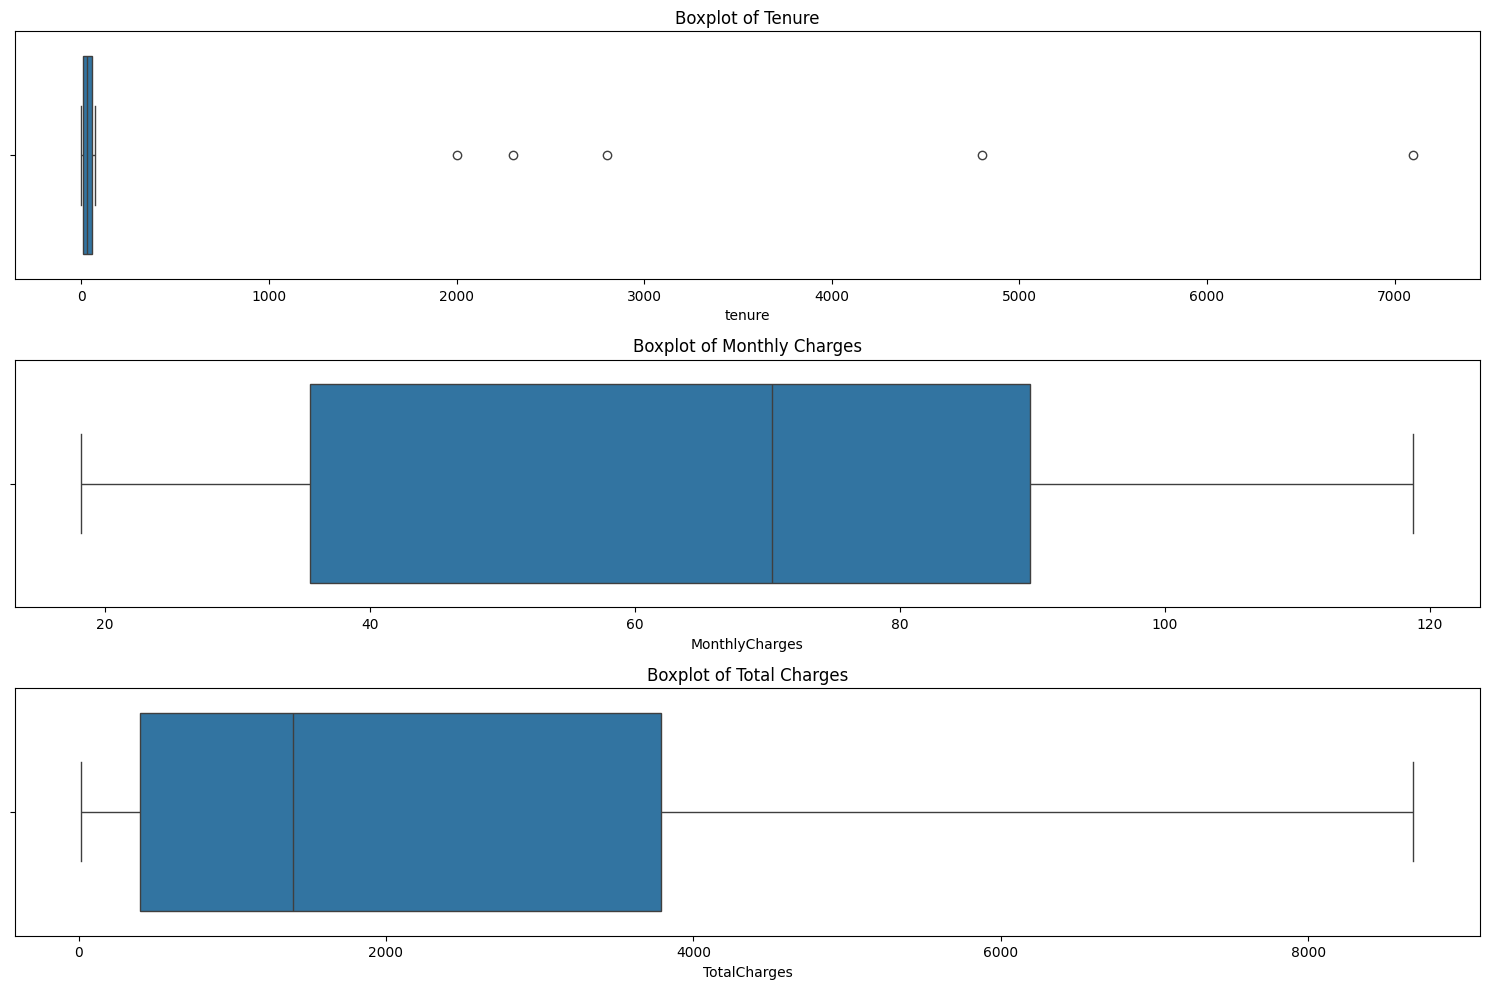

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi outliers menggunakan boxplot
plt.figure(figsize=(15, 10))

# Boxplot untuk 'tenure'
plt.subplot(3, 1, 1)
sns.boxplot(x=data_churn['tenure'])
plt.title('Boxplot of Tenure')

# Boxplot untuk 'MonthlyCharges'
plt.subplot(3, 1, 2)
sns.boxplot(x=data_churn['MonthlyCharges'])
plt.title('Boxplot of Monthly Charges')

# Boxplot untuk 'TotalCharges'
plt.subplot(3, 1, 3)
sns.boxplot(x=data_churn['TotalCharges'])
plt.title('Boxplot of Total Charges')

plt.tight_layout()
plt.show()


Hasil Pemeriksaan Outlier

1. Tenure
Distribusi: Nilai-nilai tenure tersebar dari 0 hingga sekitar 72 bulan.
Outliers: Terdapat beberapa outliers di bagian atas (tenure yang sangat panjang).
2. Monthly Charges
Distribusi: Nilai MonthlyCharges berkisar dari sekitar 20 hingga 120.
Outliers: Tidak ditemukan outlier
3. Total Charges
Distribusi: Nilai TotalCharges berkisar dari sekitar 0 hingga 8700.
Outliers: Tidak ditemukan outlier

Identifikasi Outlier

Untuk lebih memastikan maka saya menggunakan metode lain, Metode yang saya gunakan adalah Interquartile Range (IQR) untuk mengidentifikasi outliers. Outliers adalah nilai yang berada di luar 1.5 kali IQR di bawah Q1 atau di atas Q3.

In [97]:
# Menghitung IQR
Q1 = data_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.25)
Q3 = data_churn[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan outliers
outliers = ((data_churn[['tenure', 'MonthlyCharges', 'TotalCharges']] < (Q1 - 1.5 * IQR)) | (data_churn[['tenure', 'MonthlyCharges', 'TotalCharges']] > (Q3 + 1.5 * IQR))).sum()
print(outliers)


tenure            5
MonthlyCharges    0
TotalCharges      0
dtype: int64


Menangani Outliers

In [98]:
# Menghapus outliers
data_no_outliers = data_churn[~((data_churn[['tenure', 'MonthlyCharges', 'TotalCharges']] < (Q1 - 1.5 * IQR)) | (data_churn[['tenure', 'MonthlyCharges', 'TotalCharges']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Menampilkan jumlah baris sebelum dan sesudah penghapusan outliers
print("Jumlah baris sebelum penghapusan outliers:", data_churn.shape[0])
print("Jumlah baris setelah penghapusan outliers:", data_no_outliers.shape[0])

Jumlah baris sebelum penghapusan outliers: 7043
Jumlah baris setelah penghapusan outliers: 7038


Kesimpulan
- Tenure: Terdapat 5 outliers yang telah dihapus.
- MonthlyCharges dan TotalCharges: Tidak ada outliers yang terdeteksi, sehingga tidak ada perubahan pada data ini.

## Memastikan semua fitur kategorical telah di encode dan target variable telah dikonversi menjadi numerik

In [99]:
# One-hot encoding untuk fitur kategorikal
data_encoded_no_outliers = pd.get_dummies(data_no_outliers, columns=data_no_outliers.select_dtypes(include=['object']).columns.drop(['Churn']), drop_first=True)

# Encode target variable 'Churn' menjadi numerik
data_encoded_no_outliers['Churn'] = data_encoded_no_outliers['Churn'].map({'Yes': 1, 'No': 0})

# Menampilkan beberapa baris dari dataset yang sudah di-encode
data_encoded_no_outliers.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1.0,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34.0,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2.0,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45.0,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2.0,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


# Mengkonstruksi Data:
- Buat fitur baru jika diperlukan (feature engineerng)
- Normalisasi atau standarisasi data jika diperlukan

Meningkatkan kemampuan prediktif model dengan menambahkan fitur baru yang mungkin memberikan informasi tambahan.

- Tenure Group:
Mengelompokkan tenure menjadi beberapa kategori bisa membantu model memahami durasi pelanggan dalam kelompok tertentu. Misalnya, pelanggan dengan tenure 0-12 bulan mungkin memiliki perilaku yang berbeda dibandingkan dengan pelanggan yang memiliki tenure 60-72 bulan.

- TotalCharges per Month:
Alasan: Rasio TotalCharges terhadap tenure memberikan informasi tentang biaya rata-rata per bulan yang dikeluarkan oleh pelanggan. Ini bisa menjadi indikator penting dalam menganalisis churn.

- One-hot Encoding untuk TenureGroup:
Alasan: TenureGroup adalah fitur kategorikal baru, dan untuk menggunakannya dalam model machine learning, kita perlu mengubahnya menjadi format numerik.

In [100]:
# Feature Engineering: Tenure Group
data_encoded_no_outliers['TenureGroup'] = pd.cut(data_encoded_no_outliers['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12', '12-24', '24-48', '48-60', '60-72'])

# Feature Engineering: TotalCharges per Month
data_encoded_no_outliers['TotalChargesPerMonth'] = data_encoded_no_outliers['TotalCharges'] / (data_encoded_no_outliers['tenure'] + 1)

# One-hot encode TenureGroup
data_encoded_no_outliers = pd.get_dummies(data_encoded_no_outliers, columns=['TenureGroup'], drop_first=True)

# Menampilkan beberapa baris dari dataset yang sudah di-encode dan ditambahkan fitur baru
data_encoded_no_outliers.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalChargesPerMonth,TenureGroup_12-24,TenureGroup_24-48,TenureGroup_48-60,TenureGroup_60-72
0,0,1.0,29.85,29.85,0,False,False,False,False,False,...,False,True,False,True,False,14.925000,False,False,False,False
1,0,34.0,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,53.985714,False,True,False,False
2,0,2.0,53.85,108.15,1,False,False,False,False,False,...,False,True,False,False,True,36.050000,False,False,False,False
3,0,45.0,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,False,40.016304,False,True,False,False
4,0,2.0,70.70,151.65,1,False,False,False,False,False,...,False,True,False,True,False,50.550000,False,False,False,False


Fitur numerik dengan skala yang berbeda dapat mempengaruhi kinerja model machine learning. Normalisasi atau standardisasi membantu menyamakan skala fitur-fitur tersebut.

In [101]:
from sklearn.preprocessing import StandardScaler

# Identifikasi fitur numerik untuk distandardisasi
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalChargesPerMonth']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan standardisasi
data_encoded_no_outliers[numerical_features] = scaler.fit_transform(data_encoded_no_outliers[numerical_features])

# Menampilkan beberapa baris dari dataset yang sudah distandardisasi
data_encoded_no_outliers.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TotalChargesPerMonth,TenureGroup_12-24,TenureGroup_24-48,TenureGroup_48-60,TenureGroup_60-72
0,0,-1.277260,-1.160532,-0.994084,0,False,False,False,False,False,...,False,True,False,True,False,-0.757690,False,False,False,False
1,0,0.066513,-0.259772,-0.173339,0,False,False,False,False,False,...,False,False,False,False,True,-0.117902,False,True,False,False
2,0,-1.236539,-0.362811,-0.959526,1,False,False,False,False,False,...,False,True,False,False,True,-0.411677,False,False,False,False
3,0,0.514438,-0.746714,-0.194855,0,False,False,False,False,False,...,False,False,False,False,False,-0.346711,False,True,False,False
4,0,-1.236539,0.197255,-0.940328,1,False,False,False,False,False,...,False,True,False,True,False,-0.174177,False,False,False,False


# Membangun Model

1. Split data

In [102]:
from sklearn.model_selection import train_test_split

# Tentukan fitur (X) dan target (y)
X = data_encoded_no_outliers.drop(columns=['Churn'])
y = data_encoded_no_outliers['Churn']

# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran train dan test set
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (4926, 7074)
Ukuran X_test: (2112, 7074)
Ukuran y_train: (4926,)
Ukuran y_test: (2112,)


2. Train Decision Tree Model

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi model decision tree
dt_model = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=None, 
                                  min_samples_split=2,min_samples_leaf=1)
# Latih model
dt_model.fit(X_train, y_train)

# Prediksi menggunakan model decision tree
y_pred_dt = dt_model.predict(X_test)

# Evaluasi model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_confusion_matrix = confusion_matrix(y_test, y_pred_dt)

# Menampilkan hasil evaluasi
print("Decision Tree Model")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("Confusion Matrix:\n", dt_confusion_matrix)


Decision Tree Model
Accuracy: 0.7755681818181818
Precision: 0.5750528541226215
Recall: 0.4990825688073395
F1 Score: 0.5343811394891945
Confusion Matrix:
 [[1366  201]
 [ 273  272]]


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi model logistic regression dengan nilai default
lr_model_default = LogisticRegression(random_state=42, penalty='l2', C=1, class_weight=None)

# Latih model
lr_model_default.fit(X_train, y_train)

# Prediksi menggunakan model logistic regression dengan nilai default
y_pred_lr_default = lr_model_default.predict(X_test)

# Evaluasi model
lr_default_accuracy = accuracy_score(y_test, y_pred_lr_default)
lr_default_precision = precision_score(y_test, y_pred_lr_default, zero_division=0)
lr_default_recall = recall_score(y_test, y_pred_lr_default)
lr_default_f1 = f1_score(y_test, y_pred_lr_default)
lr_default_confusion_matrix = confusion_matrix(y_test, y_pred_lr_default)

# Menampilkan hasil evaluasi
print("Logistic Regression Model (Default)")
print("Accuracy:", lr_default_accuracy)
print("Precision:", lr_default_precision)
print("Recall:", lr_default_recall)
print("F1 Score:", lr_default_f1)
print("Confusion Matrix:\n", lr_default_confusion_matrix)


Logistic Regression Model (Default)
Accuracy: 0.8006628787878788
Precision: 0.6353711790393013
Recall: 0.5339449541284403
F1 Score: 0.580259222333001
Confusion Matrix:
 [[1400  167]
 [ 254  291]]


# Hasil

Accuracy: Logistic Regression memiliki akurasi yang lebih tinggi (80.07%) dibandingkan Decision Tree (77.56%).
Precision: Logistic Regression memiliki precision yang lebih tinggi (63.54%) dibandingkan Decision Tree (57.51%).
Recall: Logistic Regression memiliki recall yang sedikit lebih tinggi (53.39%) dibandingkan Decision Tree (49.91%).
F1 Score: Logistic Regression memiliki F1 Score yang lebih tinggi (58.03%) dibandingkan Decision Tree (53.44%).

# Kesimpulan

Berdasarkan hasil yang ada, logistic regression pasti adalah model yang akan saya pilih karena
- Accuracy Model lebih baik dalam memprediksi semua kejadian
- Precision Model juga lebih baik dalam memperkirakan pelanggan churn padahal tidak
- Recall tinggi berarti model berhasil mengidentifikasi sebagian besar pelanggan yang benar-benar churn
- F1 Score ataupun harmoni antara precision dan recall juga lebih tinggi